## Capstone 1 Project: Prediction of Churn for Telecom Customers (Data Wrangling)

<font color='green'>
This data set was downloaded from Kaggle (https://www.kaggle.com/blastchar/telco-customer-churn).  In this notebook, I am performing some initial exploratory data analysis and data cleaning.
</font>

# Project introduction:
The goal is to predict whether the customer has been lost (Churn) in the last month and identify the factors of the loss. Telecommunications companies, Internet providers, cable companies, and insurance companies typically use customer churn analysis and churn as their KPIs because the cost of retaining existing customers is much lower than acquiring new customers. Companies in these industries often have customer service departments that try to retain customers. The company usually divides the lost households into voluntary losses and involuntary losses: the voluntary loss of the customer's decision to switch to another company and the involuntary loss due to irresistible factors such as customer moving. In most applications, involuntary loss is excluded from the analytical model because it is not controlled by the company. Because the predictive model is able to generate potentially lost customer segments, it is possible to focus the customer retention marketing program on the most vulnerable customer segments.

In [70]:
import csv
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
csvfile = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

churn_df = pd.read_csv(csvfile)

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [71]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [72]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
print ("Rows     : " ,churn_df.shape[0])
print ("Columns  : " ,churn_df.shape[1])
print ("\nFeatures : \n" ,churn_df.columns.tolist())
print ("\nMissing values :  ", churn_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",churn_df.nunique())
print ("\nduplicate values :  \n",churn_df.duplicated().sum())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

duplicate values :  
 0


In [74]:
# Convert column TotalCharges from object to float and identify number of null entries

churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges, errors='coerce')
null_list = churn_df[churn_df['TotalCharges'].isnull()].index.tolist()
print('There are', len(null_list), 'null entries in the TotalCharges column.')

There are 11 null entries in the TotalCharges column.


In [75]:
#'TotalCharges
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(" ", 0).astype('float32')

#replace values
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].replace({1:"Yes",0:"No"})

#Separating churn and non churn customers
churn     = churn_df[churn_df["Churn"] == "Yes"]
not_churn = churn_df[churn_df["Churn"] == "No"]

In [76]:
# Dropping null entries

churn_df = churn_df.dropna()

In [77]:
churn_df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [78]:
churn_df.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [79]:
churn_df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [80]:
churn_df.MonthlyCharges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

In [81]:
not_churn.customerID.count()/len(churn_df)

0.7357792946530148

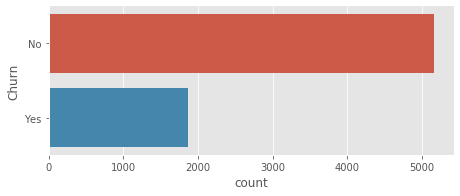

In [82]:
plt.style.use("ggplot")
sns.catplot(y="Churn", kind="count", data=churn_df, height=2.6, aspect=2.5, orient='h')

* Unbalanced target variables:
     * Not lost (Churn==No) accounted for 73.5%
     * Churn (Churn ==Yes) accounted for 26.5%

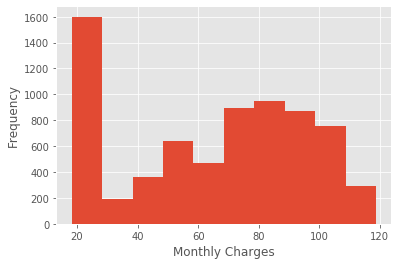

In [83]:
churn_df.MonthlyCharges.plot(kind='hist')
_ = plt.xlabel('Monthly Charges')
plt.show()

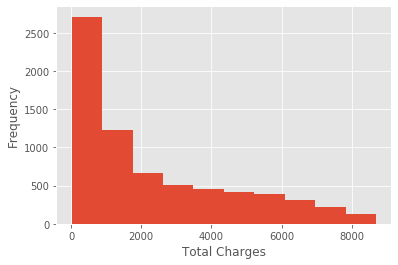

In [84]:
churn_df.TotalCharges.plot(kind='hist')
_ = plt.xlabel('Total Charges')
plt.show()

The data set was fairly clean to begin with and did not require too much cleaning and wrangling.  There are 7043 observations with 21 features.  The following was done to clean the data:

- 11 observations contained null entries, which were dropped.  
- The TotalCharges column was changed from object to float